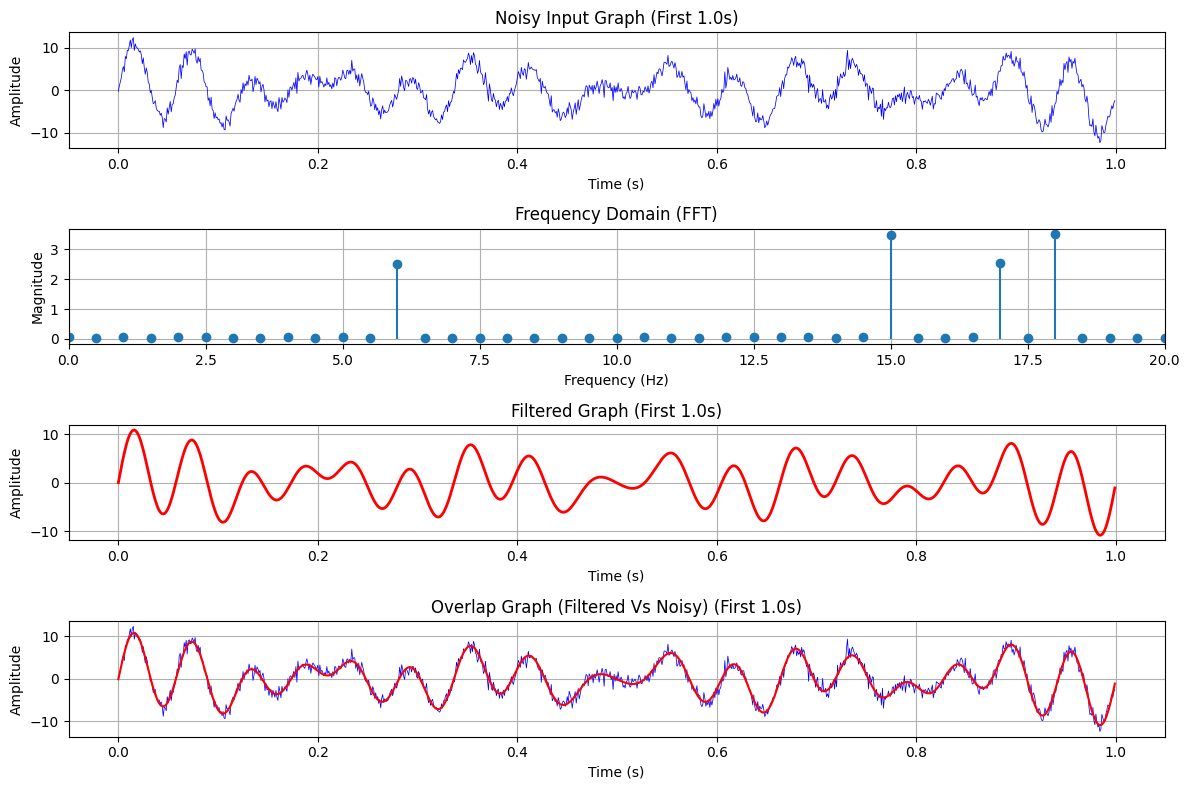

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex,display

samplerate = 1000  
duration = 2.0        
N = samplerate * duration 

t = np.linspace(0, duration, int(N), endpoint=False) 
freq1, freq2,freq3,freq4 = np.random.choice(range(1,20),4,replace=False)
signal = (3.5 * np.sin(2 * np.pi * freq1 * t) + 
          2.5 * np.sin(2 * np.pi * freq2 * t) +
          3.5 * np.sin(2 * np.pi * freq3 * t) +
          2.5 * np.sin(2 * np.pi * freq4 * t) +
          1.0 * np.random.normal(size=len(t)) )


fft_values = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal), d=1/samplerate)

half_n = len(signal) // 2
freq = fft_freqs[:half_n]
magnitudes = np.abs(fft_values)[:half_n] * (2.0 / len(signal))
full_magnitudes = np.abs(fft_values) * (2.0 / len(signal))
cleanfft = fft_values.copy()
noises = full_magnitudes < 0.5
cleanfft[noises] = 0
recarr = np.fft.ifft(cleanfft)
recsignal = np.real(recarr)
fig, ax, = plt.subplots(4, 1, figsize=(12, 8))

ax[0].plot(t[:1000], signal[:1000], color='b',linewidth=0.55, label='Original (Noisy)')
ax[0].set_title('Noisy Input Graph (First 1.0s)')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)


ax[1].stem(freq, magnitudes, basefmt=" ") 
ax[1].set_title('Frequency Domain (FFT)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlim(0, 20)  
ax[1].grid(True)

ax[2].plot(t[:1000], recsignal[:1000], color='r', linewidth=2, label='Filtered (Clean)')
ax[2].set_title('Filtered Graph (First 1.0s)')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Amplitude')
ax[2].grid(True)


ax[3].plot(t[:1000], signal[:1000], color='b',linewidth=0.55, label='Original (Noisy)')
ax[3].plot(t[:1000], recsignal[:1000], color='r', linewidth=1.5, label='Filtered (Clean)')
ax[3].set_title('Overlap Graph (Filtered Vs Noisy) (First 1.0s)')
ax[3].set_xlabel('Time (s)')
ax[3].set_ylabel('Amplitude')
ax[3].grid(True)

plt.tight_layout()
plt.show()